**MULTIPLE LINEAR REGRESSION USING GRADIENT DESCENT**


Type of X_train:  <class 'numpy.ndarray'> Shape of X_train:  (400, 14)
Type of X_test:  <class 'numpy.ndarray'> Shape of X_test:  (106, 14)
Type of theta:  <class 'numpy.ndarray'> Shape of theta:  (14,)
Theta:  [ 2.43334866e+01 -1.00422810e+00  8.97465995e-01  3.81192307e-02
  5.53169904e-01 -1.15135300e+00  3.73228812e+00 -2.89323767e-03
 -2.45670975e+00  2.14511707e+00 -1.18398810e+00 -1.65875332e+00
  5.79252084e-02 -3.49652860e+00]
Theta's shape:  (14,)
Mean Absolute Error:  4.786959128806712
Mean Squared Error:  33.04129558437275


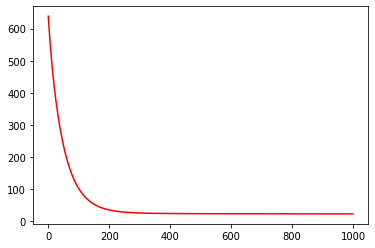

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#training
X, y = datasets.load_boston(return_X_y=True)
X_train_temp1 = X[0:400,:]
X_train = np.zeros((X_train_temp1.shape[0], X_train_temp1.shape[1] + 1))
X_train[:, 0] = np.ones((X_train_temp1.shape[0]))
X_train[:, 1:] = X_train_temp1
print("Type of X_train: ", type(X_train), "Shape of X_train: ", X_train.shape)
y_train = y[0:400]

#validation
X_test_temp1 = X[400:506, :]
X_test = np.zeros((X_test_temp1.shape[0], X_test_temp1.shape[1] + 1))
X_test[:, 0] = np.ones((X_test_temp1.shape[0]))
X_test[:, 1:] = X_test_temp1
print("Type of X_test: ", type(X_test), "Shape of X_test: ", X_test.shape)
y_test = y[400:506]

#preprocessing
scaler=StandardScaler()
scaler.fit(X_train[:, 1:])
X_train[:, 1:] = scaler.transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

theta = np.random.uniform(0, 1, size = (X_train.shape[1]))
print("Type of theta: ", type(theta), "Shape of theta: ", theta.shape)
niterations = 1000
alpha = 0.01

m = X_train.shape[0]
n = X_train.shape[1]
cost = list()
theta1 = list()

for i in range(niterations):
    update = np.zeros(X_train.shape[1])
    ypred = np.dot(X_train, theta)
    error = ypred - y_train
    for j in range(n):
        update[j] = np.sum(error * (X_train.T)[j])
    theta = theta - (1/m) * alpha * update
    theta1.append(theta[1])
    cost.append(np.sum((np.dot(X_train, theta) - y_train)**2)/m)

print("Theta: ", theta)
print("Theta's shape: ", theta.shape)
predictions = np.dot(X_test, theta)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_true = y_test, y_pred = predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_true = y_test, y_pred = predictions))
plt.plot(range(0, niterations), cost, color='red')
#plt.plot(theta1, cost)

**MULTIPLE LINEAR REGRESSION USING NORMAL EQUATION**

In [2]:
#multiple linear regression using normal equation
import numpy as np
from sklearn import datasets, metrics
from numpy.linalg import inv, pinv, LinAlgError

X, y = datasets.load_boston(return_X_y=True)

X_train_temp1 = X[0:400,:]
X_train = np.zeros((X_train_temp1.shape[0], X_train_temp1.shape[1] + 1))
X_train[:, 0] = np.ones((X_train_temp1.shape[0]))
X_train[:, 1:] = X_train_temp1
print("Type of X_train: ", type(X_train), "Shape of X_train: ", X_train.shape)
y_train = y[0:400]

X_test_temp1 = X[400:506, :]
X_test = np.zeros((X_test_temp1.shape[0], X_test_temp1.shape[1] + 1))
X_test[:, 0] = np.ones((X_test_temp1.shape[0]))
X_test[:, 1:] = X_test_temp1
print("Type of X_test: ", type(X_test), "Shape of X_test: ", X_test.shape)
y_test = y[400:506]

theta = np.zeros(X_train.shape[1])

try:
    XTXi = inv(np.dot(X_train.T, X_train))
except:
    XTXi = pinv(np.dot(X_train.T, X_train))

XTy = np.dot(X_train.T, y_train)

theta = np.dot(XTXi, XTy)

print("Thetas: ", theta)
print("Theta's Shape: ", theta.shape)

predictions = np.dot(theta, X_test.T)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_true = y_test, y_pred = predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_true = y_test, y_pred = predictions))

Type of X_train:  <class 'numpy.ndarray'> Shape of X_train:  (400, 14)
Type of X_test:  <class 'numpy.ndarray'> Shape of X_test:  (106, 14)
Thetas:  [ 2.86725996e+01 -1.91246374e-01  4.42289967e-02  5.52207977e-02
  1.71631351e+00 -1.49957220e+01  4.88773025e+00  2.60921031e-03
 -1.29480799e+00  4.84787214e-01 -1.54006673e-02 -8.08795026e-01
 -1.29230427e-03 -5.17953791e-01]
Theta's Shape:  (14,)
Mean Absolute Error:  5.142232214463155
Mean Squared Error:  37.893778599572414
